# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**

# **Nombre y matrícula:** Enma Galindo - A01795095

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cargamos los datos:

df = pd.read_csv ("/content/drive/MyDrive/MNA - Ciencia y Análisis de Datos /dataset_Facebook.csv",sep=' ')
print(df.shape)
df.head(3)

(500, 47)


,Page,total,likes;Type;Category;Post,Month;Post,Weekday;Post,Hour;Paid;Lifetime,Post,Total,Reach;Lifetime,Post.1,...,have.1,liked.1,your.2,Page.1,and,engaged,with,your.3,post;comment;like;share;Total,Interactions
0,139441;Photo;2;12;4;3;0;2752;5091;178;109;159;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,139441;Status;2;12;3;10;0;10460;19057;1457;136...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,139441;Photo;3;12;3;3;0;2413;4373;177;113;154;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Ruta al archivo en tu Google Drive
file_path = "/content/drive/MyDrive/MNA - Ciencia y Análisis de Datos /Facebook_metrics.txt"
with open(file_path, 'r', encoding='ISO-8859-1') as file:
    data = file.read()

print(data)

Citation Request:

   This dataset is public available for research. The details are described in (Moro et al., 2016).
   Please include this citation if you plan to use this database: 

   (Moro et al., 2016) S. Moro, P. Rita and B. Vala. Predicting social media performance metrics and evaluation 
   of the impact on brand building: A data mining approach. Journal of Business Research, Elsevier, In press.
 
   Available at: http://dx.doi.org/10.1016/j.jbusres.2016.02.010


1. Title: Facebook performance metrics

2. Sources
   Created by: Sérgio Moro, Paulo Rita and Bernardo Vala (ISCTE-IUL) @ 2016
   
3. Past Usage:

   The full dataset was described and analyzed in:

   S. Moro, P. Rita and B. Vala. Predicting social media performance metrics and evaluation of the impact on 
   brand building: A data mining approach. Journal of Business Research, Elsevier, In press, Available online 
   since 28 February 2016.

4. Relevant Information:

   The data is related to posts' published duri

In [6]:
# Obtener las variables presentes en el DataFrame
variables = df.columns

# Mostrar las variables
print(variables)

Index(['Page', 'total', 'likes;Type;Category;Post', 'Month;Post',
       'Weekday;Post', 'Hour;Paid;Lifetime', 'Post', 'Total', 'Reach;Lifetime',
       'Post.1', 'Total.1', 'Impressions;Lifetime', 'Engaged',
       'Users;Lifetime', 'Post.2', 'Consumers;Lifetime', 'Post.3',
       'Consumptions;Lifetime', 'Post.4', 'Impressions', 'by', 'people', 'who',
       'have', 'liked', 'your', 'Page;Lifetime', 'Post.5', 'reach', 'by.1',
       'people.1', 'who.1', 'like', 'your.1', 'Page;Lifetime.1', 'People',
       'who.2', 'have.1', 'liked.1', 'your.2', 'Page.1', 'and', 'engaged',
       'with', 'your.3', 'post;comment;like;share;Total', 'Interactions'],
      dtype='object')


In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py


Las curvas de aprendizaje son un instrumento crucial para evaluar la eficacia de un modelo de aprendizaje automático en función del tamaño del conjunto de datos de aprendizaje. They let you see how the model's performance changes as the amount of training data increases.

El procedimiento general para crear curvas de aprendizaje incluye lo siguiente:

1. El conjunto de datos se divide en sets de capacitación y test.
2. El modelo se entrena en subconjuntos de entrenamiento de diferentes tamaños.
3. Se evalua la eficacia del modelo en los sets de capacitación y prueba para cada tamaño de set de datos.
4. Los pasos 2 y 3 se repiten repetidamente para obtener estadísticas significativas.

La relación entre el tamaño del conjunto de datos de entrenamiento (eje x) y alguna medida de rendimiento del modelo (eje y), como la precisión o el error, se muestra en una curva de aprendizaje típica.

Definición de curvas de aprendizaje:

- Si la curva de aprendizaje falla tanto en los conjuntos de entrenamiento como de prueba, esto indica un problema de subentrenamiento (underfitting), lo que significa que el modelo es demasiado simple para capturar la estructura subyacente de los datos.
- Si hay una gran diferencia en el rendimiento entre los conjuntos de entrenamiento y prueba, esto puede indicar un problema de sobreentrenamiento, que ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y no puede generalizar adecuadamente a los nuevos datos.
- Si el rendimiento de ambos conjuntos converge a medida que aumenta el tamaño del conjunto de entrenamiento, esto sugiere que el modelo está alcanzando su capacidad máxima y que agregar más datos de entrenamiento probablemente no mejorará significativamente el rendimiento.



## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


El objetivo del problema planteado en el artículo de Moro et al. es predecir el desempeño de una campaña publicitaria en redes sociales, particularmente en Facebook. Esto implica comprender y anticipar métricas importantes de rendimiento, como la participación, el alcance y la interacción de los usuarios con las publicaciones patrocinadas en esta plataforma. El objetivo es brindar a los especialistas en marketing una herramienta predictiva que les permita tomar decisiones más informadas sobre la asignación de recursos y la optimización de campañas publicitarias en Facebook, lo que puede conducir an una mejor eficacia en términos de alcance de audiencia y retorno de la inversión (ROI).


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

Las tablas 2 y 3 del documento sirven como referencia para describir el significado de las ocho variables utilizadas en el artículo de Moro et al. Luego explico el significado de cada uno:

1. Page total likes: Esta variable representa el número total de "me gusta" que tiene la página de Facebook que lanza la campaña publicitaria. Es una medida de la popularidad general de la página.

2. Type: Indica el tipo de publicación que se realiza en la página de Facebook. Puede ser una publicación de enlace, una foto, un estado o un video.

3. Category: Representa la categoría a la que pertenece la publicación. En este estudio, las categorías incluyen acciones, productos, inspiración, entretenimiento y otros.

4. Post month: Es el mes en el que se realizó la publicación en Facebook.

5. Post hour: Es la hora del día en la que se realizó la publicación.

6. Post weekday: Indica el día de la semana en el que se realizó la publicación.

7. Paid: Es una variable binaria que indica si la publicación fue promocionada mediante un pago o no.

8. Lifetime post total reach: Esta variable representa el alcance total de la publicación en términos de usuarios únicos alcanzados desde la creación de la página hasta el momento de la publicación.

Estas variables se utilizan para predecir el rendimiento de las campañas publicitarias en redes sociales y brindan información relevante sobre las características de las publicaciones en Facebook.









### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [13]:
# Cargamos los datos:

data = pd.read_csv('/content/drive/MyDrive/MNA - Ciencia y Análisis de Datos /dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [14]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [15]:
Xtrain.describe().T   # veamos alguna descripción como datos numéricos

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [16]:
ytrain.describe().T   # lo mismo para la variable de salida

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


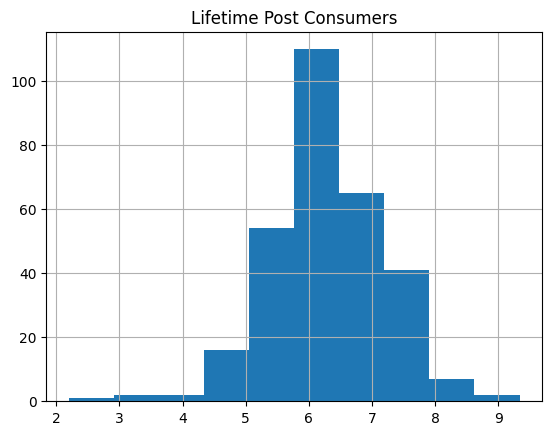

In [17]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [18]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [19]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
# Como solo tenemos una numérica, la podemos dejar sin escalar:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


# Ajustamos en Train y transformamos en Val y Test:
XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT  =  XtrainFit.transform(Xval)
XtestT  =  XtrainFit.transform(Xtest)

In [20]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std())
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std())

Desv-Est y-original: 1007.420
Desv-Est y-logaritmo: 0.906


## **Ejercicio 3**


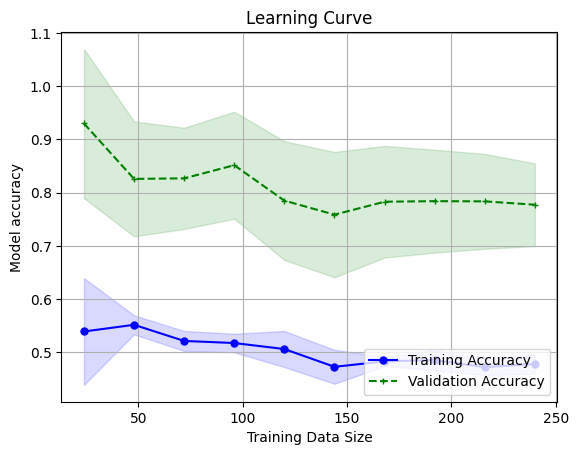

In [22]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [23]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de los nejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.697


## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [ ]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias para
# responder el Ejercicio 4.

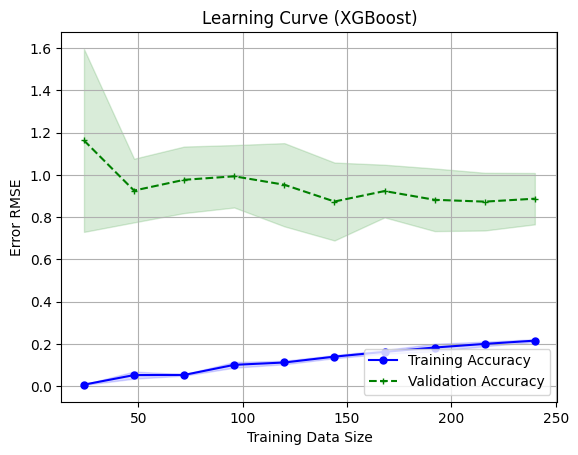

Error RMSE(Test) de XGBoost: 0.758


In [24]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++
# Por ejemplo:
elmodelo_XGB = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_XGB)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error',
                                                        n_jobs=-1)

# Calculamos los promedios y desviación estándar de entrenamiento para RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve (XGBoost)')
plt.xlabel('Training Data Size')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Calculamos el RMSE en los datos de prueba
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_XGB = mipipe.predict(Xtest)
print('Error RMSE(Test) de XGBoost: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_XGB)))


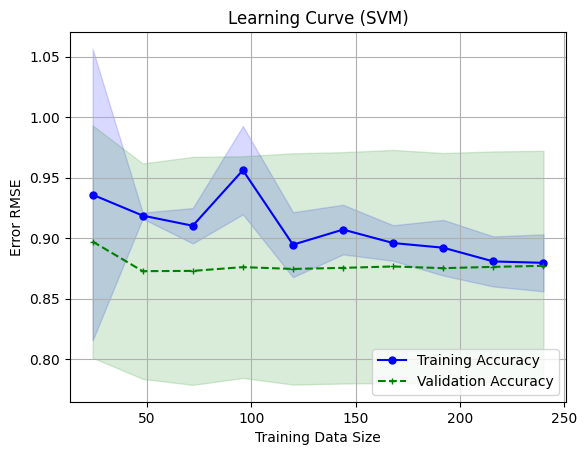

Error RSME(Test) de SVM: 0.935


In [25]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++
# Por ejemplo:
elmodelo_SVM = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_SVM)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error',
                                                        n_jobs=-1)

# Calculamos los promedios y desviación estándar de entrenamiento para RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve (SVM)')
plt.xlabel('Training Data Size')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Calculamos el RMSE en los datos de prueba
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_SVM = mipipe.predict(Xtest)
print('Error RSME(Test) de SVM: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_SVM)))


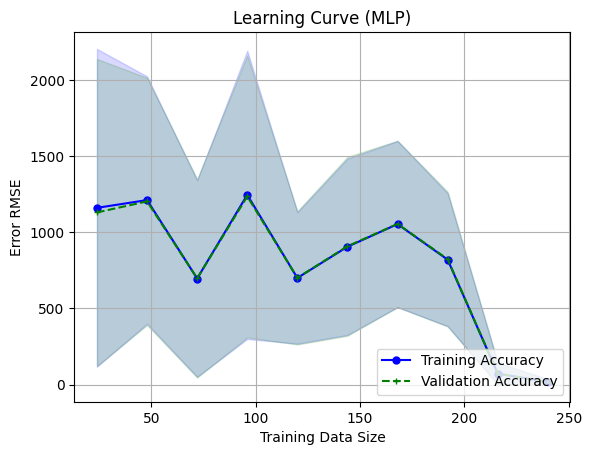

Error RMSE(Test) de MLP: 3.181


In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++
# Por ejemplo:
elmodelo_MLP = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_MLP)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error',
                                                        n_jobs=-1)

# Calculamos los promedios y desviación estándar de entrenamiento para RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve (MLP)')
plt.xlabel('Training Data Size')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Calculamos el RMSE en los datos de prueba
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_MLP = mipipe.predict(Xtest)
print('Error RMSE(Test) de MLP: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_MLP)))


# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

Resultados:
- Error RSME(Test) de Random Forest: 0.697
- Error RMSE(Test) de XGBoost: 0.758
- Error RSME(Test) de SVM: 0.935
- Error RMSE(Test) de MLP: 3.181

Según los resultados proporcionados, se puede ver que el modelo Random Forest obtuvo el error RMSE más bajo en los datos de prueba con un valor de 0,697. Esto indica que, en este caso particular, el modelo Random Forest fue el más preciso en predecir el desempeño de las campañas de publicidad en redes sociales.

Random Forest superó an otros modelos como XGBoost, SVM y MLP en términos de precisión de predicción. El aumento de los errores RMSE en los modelos XGBoost, SVM y MLP indica que estos modelos tenían problemas para generalizar a datos no vistos y ofrecían predicciones menos precisas que el modelo Random Forest.

Estos resultados respaldan la conclusión de que el modelo Random Forest fue el más eficaz y generalizable para este problema particular de predicción del rendimiento de la campaña publicitaria en redes sociales. Además, estos hallazgos corroboran la capacidad de Random Forest para manejar conjuntos de datos complejos, capturar relaciones no lineales entre variables y reducir la sobrecarga y la variabilidad.

Por lo tanto, en el contexto de esta investigación, el modelo Random Forest demostró ser el mejor método para predecir el desempeño de campañas publicitarias en redes sociales, brindando a los especialistas en marketing y publicidad una herramienta eficaz para optimizar sus estrategias publicitarias. Publicidad en plataformas como Facebook.

>> **Fin de la Actividad de la Semana 7**